In [25]:
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from seaborn import load_dataset, pairplot
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif


In [28]:
df = pd.read_csv("ml_data.csv")
df = df.set_index('X')

df

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,D9,D10,D11,D12,D13,D14,D15,D16,D17,D18
X,,,,,,,,,,,,,,,,,,,,,
Y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
A1BG,13.0,18.0,9.0,13.0,14.0,6.0,4.0,6.0,3.0,3.0,...,8.0,3.0,12.0,5.0,16.0,15.0,7.0,5.0,4.0,3.0
A1BG-AS1,7.0,5.0,3.0,3.0,8.0,6.0,8.0,10.0,5.0,2.0,...,3.0,5.0,13.0,9.0,9.0,12.0,2.0,3.0,4.0,1.0
A1CF,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0
A2M,6701.0,6744.0,3251.0,3359.0,2010.0,1926.0,1693.0,1745.0,1656.0,1606.0,...,1886.0,1876.0,2888.0,2876.0,3250.0,3259.0,1456.0,1416.0,2357.0,2357.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,5.0,2.0,1.0,1.0,4.0,4.0,1.0,0.0,8.0,14.0,...,17.0,26.0,1.0,5.0,2.0,0.0,0.0,0.0,2.0,2.0
ZYG11B,437.0,436.0,178.0,158.0,151.0,203.0,320.0,301.0,121.0,134.0,...,235.0,222.0,333.0,405.0,343.0,341.0,153.0,160.0,199.0,217.0
ZYX,1469.0,1382.0,350.0,302.0,343.0,367.0,661.0,629.0,169.0,201.0,...,324.0,330.0,732.0,782.0,1359.0,1393.0,501.0,489.0,512.0,499.0


In [29]:
df = df.T
df

X,Y,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
C1,0.0,13.0,7.0,0.0,6701.0,26.0,4.0,5.0,0.0,75.0,...,45.0,9.0,30.0,59.0,226.0,5.0,437.0,1469.0,335.0,382.0
C2,0.0,18.0,5.0,0.0,6744.0,29.0,5.0,2.0,3.0,82.0,...,44.0,4.0,34.0,44.0,237.0,2.0,436.0,1382.0,383.0,425.0
C3,0.0,9.0,3.0,0.0,3251.0,41.0,4.0,0.0,1.0,48.0,...,51.0,25.0,7.0,14.0,101.0,1.0,178.0,350.0,75.0,145.0
C4,0.0,13.0,3.0,0.0,3359.0,31.0,3.0,2.0,0.0,51.0,...,52.0,27.0,15.0,22.0,106.0,1.0,158.0,302.0,82.0,156.0
C5,0.0,14.0,8.0,1.0,2010.0,19.0,5.0,2.0,0.0,212.0,...,67.0,84.0,21.0,22.0,173.0,4.0,151.0,343.0,250.0,280.0
C6,0.0,6.0,6.0,0.0,1926.0,18.0,1.0,2.0,0.0,175.0,...,71.0,74.0,11.0,21.0,187.0,4.0,203.0,367.0,215.0,282.0
C7,0.0,4.0,8.0,2.0,1693.0,16.0,3.0,0.0,0.0,166.0,...,123.0,141.0,15.0,35.0,173.0,1.0,320.0,661.0,205.0,257.0
C8,0.0,6.0,10.0,0.0,1745.0,14.0,2.0,0.0,0.0,162.0,...,116.0,117.0,22.0,32.0,146.0,0.0,301.0,629.0,202.0,265.0
C9,0.0,3.0,5.0,0.0,1656.0,5.0,10.0,1.0,0.0,95.0,...,56.0,81.0,10.0,24.0,112.0,8.0,121.0,169.0,132.0,191.0
C10,0.0,3.0,2.0,1.0,1606.0,5.0,19.0,3.0,2.0,93.0,...,79.0,74.0,17.0,19.0,79.0,14.0,134.0,201.0,103.0,186.0


In [30]:

y = df['Y']




In [31]:
X = df.drop(columns=['Y'])
X = X.loc[:, X.apply(pd.to_numeric, errors='coerce').notna().all()]


In [32]:
from sklearn.feature_selection import SelectKBest, f_classif


In [33]:
from sklearn.impute import SimpleImputer


In [34]:
imputer = SimpleImputer(strategy='mean')  # <== You were missing this!
X_imputed = imputer.fit_transform(X)

In [35]:
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X_imputed, y)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [   99   252   253 ... 28080 28217 28221] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


SelectKBest(k='all')

In [36]:
if len(X.columns) != len(selector.scores_):
    print(f"Dropping extra column: {X.columns[-1]}")
    X = X.iloc[:, :-1]


In [37]:
X_clean = df.drop(labels=['Y'], axis=1)


In [38]:
X_clean = df.drop(columns=['Y'])
X_clean = X_clean.loc[:, X_clean.apply(pd.to_numeric, errors='coerce').notna().all()]


In [39]:
imputer = SimpleImputer(strategy='mean')  # <== You were missing this!
X_imputed = imputer.fit_transform(X)

selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X_imputed, y)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [   99   252   253 ... 28080 28217 28221] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


SelectKBest(k='all')

<ipython-input-40-d659641461c2>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score', y='Feature', data=top_twenty, palette='viridis')


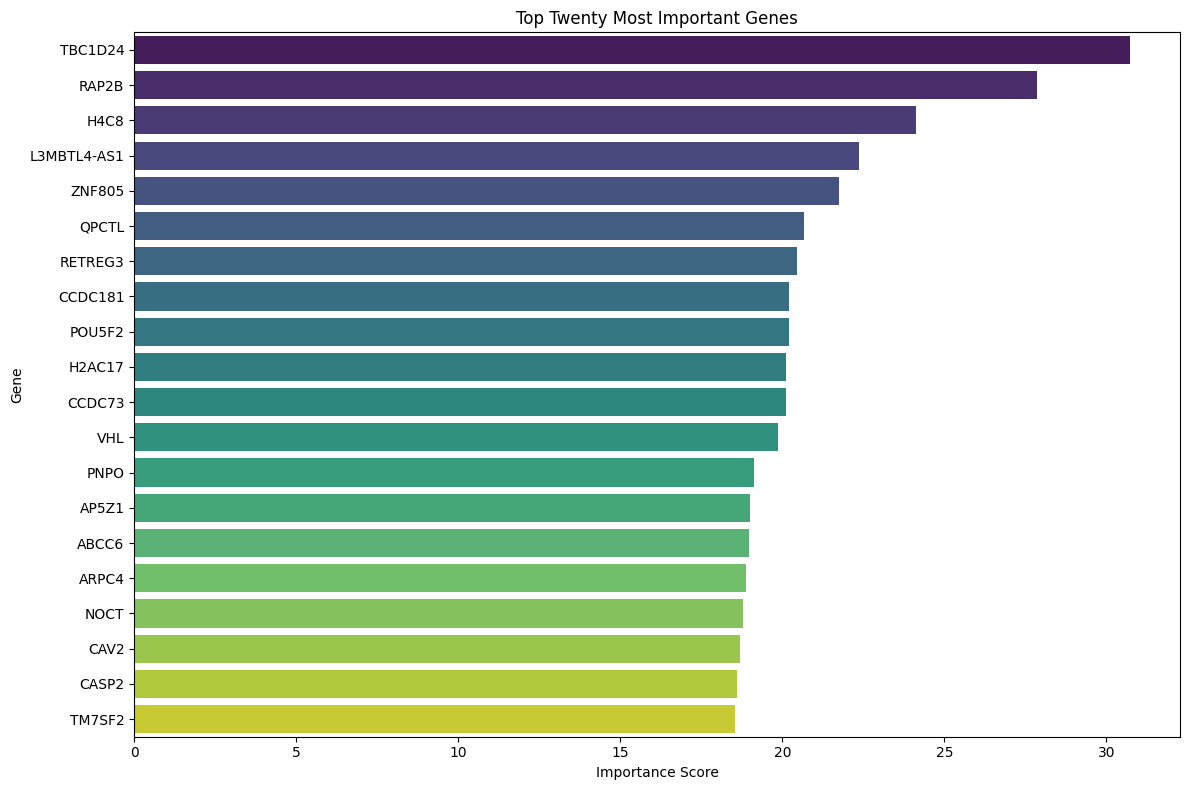

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [   99   252   253 ... 28178 28217 28221] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw



Best Parameters from Grid Search: {'C': 0.1}
Best CV Accuracy: 0.9200
Test Set Accuracy: 0.8750

Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      1.00      0.86         3
         1.0       1.00      0.80      0.89         5

    accuracy                           0.88         8
   macro avg       0.88      0.90      0.87         8
weighted avg       0.91      0.88      0.88         8

Confusion Matrix:
 [[3 0]
 [1 4]]


In [40]:

valid_scores_mask = ~np.isnan(selector.scores_)
valid_features = X.columns[valid_scores_mask]
valid_scores = selector.scores_[valid_scores_mask]

feature_scores = pd.DataFrame({
    'Feature': valid_features,
    'Score': valid_scores
})

top_twenty = feature_scores.sort_values(by='Score', ascending=False).head(20)
plt.figure(figsize=(12, 8))
sns.barplot(x='Score', y='Feature', data=top_twenty, palette='viridis')
plt.xlabel('Importance Score')
plt.ylabel('Gene')
plt.title('Top Twenty Most Important Genes')
plt.tight_layout()
plt.show()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

selector_top2 = SelectKBest(f_classif, k=2)
X_train_sel = selector_top2.fit_transform(X_train, y_train)
X_test_sel = selector_top2.transform(X_test)

svc = SVC(kernel='linear', random_state=42)

#Hyperparameter tuning
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train_sel, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_sel)

print("\nBest Parameters from Grid Search:", grid_search.best_params_)
print("Best CV Accuracy: {:.4f}".format(grid_search.best_score_))
print("Test Set Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred)))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



In [41]:
from sklearn.metrics import accuracy_score

y_pred = best_model.predict(X_test_sel)

print("Test Set Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred)))


Test Set Accuracy: 0.8750


<ipython-input-43-3e98ae109f81>:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(top_twenty['Feature'], fontweight='bold')  # Make y-tick labels bold


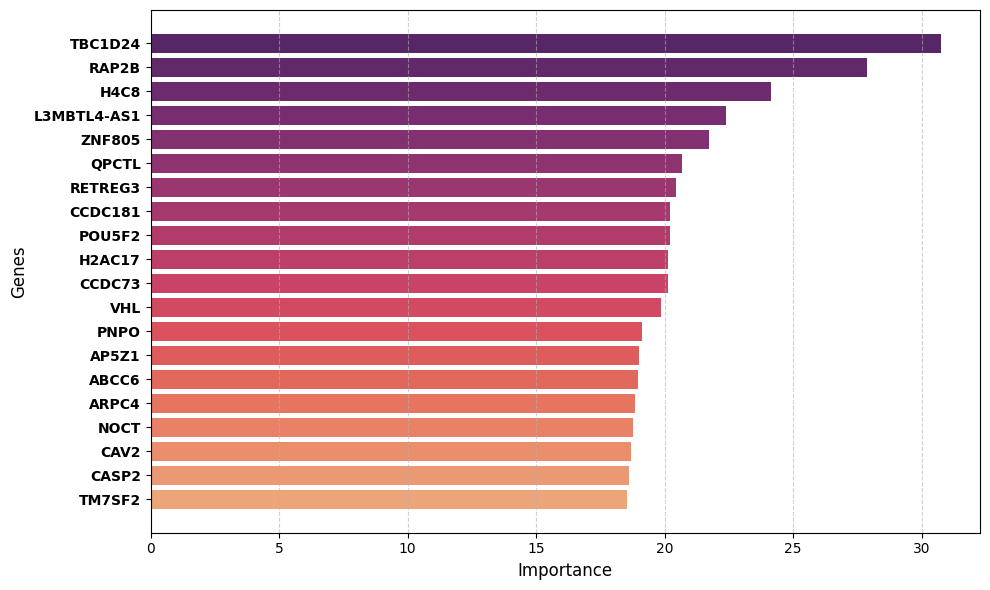

<Figure size 640x480 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

top_twenty = feature_scores.sort_values(by='Score', ascending=False).head(20)

colors = sns.color_palette("flare_r", n_colors=len(top_twenty))

plt.figure(figsize=(10, 6))
plt.barh(top_twenty['Feature'], top_twenty['Score'], color=colors)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Genes', fontsize=12)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tick_params(axis='y', labelsize=10, labelcolor='black')
plt.gca().set_yticklabels(top_twenty['Feature'], fontweight='bold')

plt.tight_layout()
